In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Data 

X shape: (10, 1)
y shape: (10, 1)


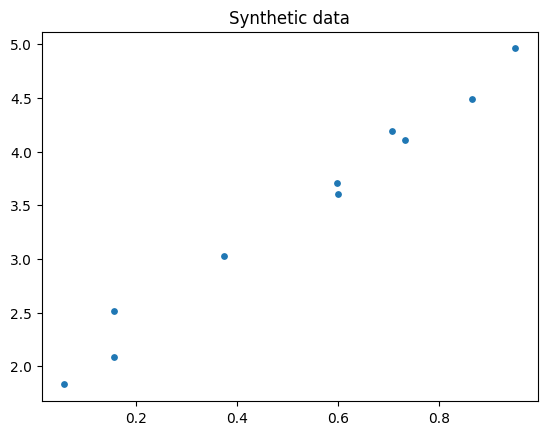

In [8]:
np.random.seed(42)

# True parameters (unknown to the model)
w_true = 3.0
b_true = 2.0

# Make data: y = 3x + 2 + noise
N = 10
X = np.random.rand(N, 1)              # shape (N, 1)
noise = 0.2 * np.random.randn(N, 1)   # small Gaussian noise
y = w_true * X + b_true + noise       # shape (N, 1)

print("X shape:", X.shape)
print("y shape:", y.shape)

plt.scatter(X, y, s=15)
plt.title("Synthetic data")
plt.show()

### Define the Linear Regression

In [9]:
# Initialize parameters (random guess)
w = np.random.randn(1, 1)  # shape (1,1)
b = np.zeros((1,))         # shape (1,)

print("w initial:", w)
print("b initial:", b)


w initial: [[-0.90802408]]
b initial: [0.]


### Forward Pass

In [10]:
def predict(X, w, b):
    """
    X: (N, 1)
    w: (1, 1)
    b: (1,)
    """
    return X @ w + b

In [13]:
X

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258]])

In [14]:
w

array([[-0.90802408]])

In [11]:
y_pred = predict(X, w, b)

print("y_pred shape:", y_pred.shape)

y_pred shape: (10, 1)


In [12]:
y_pred

array([[-0.34009145],
       [-0.86327148],
       [-0.66466812],
       [-0.54359632],
       [-0.14166868],
       [-0.14164678],
       [-0.05274132],
       [-0.78650879],
       [-0.5458269 ],
       [-0.64294695]])

### Compute Loss

In [16]:
def mse_loss(y_pred, y_true):
    """
    y_pred: (N, 1)
    y_true: (N, 1)
    """
    return np.mean((y_pred - y_true) ** 2)

In [17]:
loss = mse_loss(y_pred, y)
print("Initial loss:", loss)

Initial loss: 16.992985050306725


### Backward Pass

In [19]:
def compute_gradients(X,y,y_pred):
    """
    X: (N, 1)
    y: (N, 1)
    y_pred: (N, 1)
    """
    N = X.shape[0]
    error = y_pred - y 
    dw = (2/N)*(X.T @ error)
    db = (2/N)*np.sum(error)
    return dw,db

In [20]:
dw, db = compute_gradients(X, y, y_pred)

print("dw:", dw)
print("db:", db)

dw: [[-4.83645978]]
db: -7.84488701687948


### Parameter Update

In [23]:
def update_params(w, b, dw, db, lr):
    """
    w: (1, 1)
    b: (1,)
    dw: gradient of w
    db: gradient of b
    lr: learning rate
    """
    w = w - lr * dw
    b = b - lr * db
    return w, b

In [ ]:
lr = 0.1
w, b = update_params(w, b, dw, db, lr)

print("updated w:", w)
print("updated b:", b)

updated w: [[-0.4243781]]
updated b: [0.7844887]


In [25]:
epochs = 100
for epoch in range(epochs):

    #Forward
    y_pred  = predict(X,w,b)

    #loss
    loss = mse_loss(y_pred,y)

    #Backward
    dw,db = compute_gradients(X,y,y_pred)

    #Update
    w,b = update_params(w,b,dw,db,lr)

    if epoch%10==0:
        print(f"epoch {epoch} | loss {loss:.4f}")

epoch 0 | loss 9.5940
epoch 10 | loss 0.4481
epoch 20 | loss 0.3252
epoch 30 | loss 0.2496
epoch 40 | loss 0.1925
epoch 50 | loss 0.1494
epoch 60 | loss 0.1168
epoch 70 | loss 0.0921
epoch 80 | loss 0.0735
epoch 90 | loss 0.0595
